# 2-2. Numpy 패키지 (Base N-dimensional array package)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3) # 소숫점 표현방식. 배열값 보기 편하게 조정

## 2-2-1. 배열 만들기

In [2]:
arry = np.array([1,2,3])
print(arry[0])

1


In [3]:
multi_arry = np.array([[1,2,3],[4,5,6]])
print(multi_arry.shape) 

(2, 3)


In [4]:
print(multi_arry[0][0:2]) #첫번째 행의 0~1번째 값

[1 2]


In [5]:
## 2-2-2. 자료 불러오기

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

raw_file = 'KMA_seoul_raw_data.csv'
seoul = np.genfromtxt(raw_file, encoding='euc-kr',dtype=None, 
                      delimiter=',',
                     names=('loc_num','loc_name','date','conc'),
                     comments='#', skip_header=1)

In [7]:
print(seoul[0:4]) #튜블형식으로 저장되어있음을 화긴할 수 있다. 
print(seoul.shape)

[(108, '서울', 'May-08', 63) (108, '서울', 'Jun-08', 42)
 (108, '서울', 'Jul-08', 37) (108, '서울', 'Aug-08', 27)]
(140,)


In [8]:
seoul = seoul[8:56] #2009년 1월 부터 2012년 12월까지로 자료를 제한
print(seoul.shape)

(48,)


In [9]:
print(type(seoul))

<class 'numpy.ndarray'>


In [10]:
print(seoul.dtype) #저장된 변수의 타입을 표시

[('loc_num', '<i4'), ('loc_name', '<U2'), ('date', '<U6'), ('conc', '<i4')]


In [11]:
print(seoul[0:5])

[(108, '서울', 'Jan-09', 57) (108, '서울', 'Feb-09', 81)
 (108, '서울', 'Mar-09', 59) (108, '서울', 'Apr-09', 63)
 (108, '서울', 'May-09', 56)]


In [12]:
print(seoul['date'][0:5])

['Jan-09' 'Feb-09' 'Mar-09' 'Apr-09' 'May-09']


In [13]:
print(seoul['conc'][0:5])

[57 81 59 63 56]


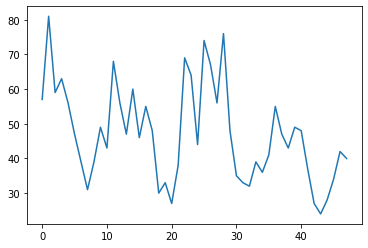

In [14]:
plt.plot(seoul['conc']);
plt.show()

# 2-2-3. 기본적인 통계기법 사용

In [15]:
seoul_values = seoul['conc']

In [16]:
type(seoul_values)

numpy.ndarray

In [17]:
seoul_values.min() #최솟값 ; np.min(seoul_values) 도 같은 결과

24

In [18]:
seoul_values.max()

81

In [19]:
seoul_values.mean() #평균 ; np.mean(seoul_values)

47.083333333333336

In [20]:
seoul_values.std()

13.845627067377228

In [21]:
seoul_values.sum()

2260

In [22]:
np.sum(seoul_values)

2260

## 2-2-4. 자료저장

In [23]:
#seoul 변수의 PN10값만 뽑아서 다음과 같이 csv 파일 형식의 아스키파일로 저장해줄 수 있음

In [24]:
np.savetxt('seoul_pm_values.csv', [seoul['conc']],fmt='%.1f', delimiter=',')
#소숫점 1번째 자리까지만 자료 저장

In [25]:
#바이너리 형태로 저장

f=open('seoul_pm_values.bin','wb') # w : write, b : binary
seoul['conc'].tofile(f)
f.close()

#cmd 창에서 생성되었음 확인할 수 있음. 

## 2-2-5. 자주 사용되는 함수

In [26]:
A = np.arange(9)
print(A)

[0 1 2 3 4 5 6 7 8]


In [27]:
np.where(A%2==1) #배열 A의 값이 홀수인 인덱스를 알려줌

(array([1, 3, 5, 7], dtype=int64),)

In [28]:
np.where(A%2==1, A, 0) #배열 A의 값이 홀수이면 본래값, 짝수이면 0으로 변환

array([0, 1, 0, 3, 0, 5, 0, 7, 0])

In [29]:
np.where((A>3) & (A<7),A,-1) # 3< <7 사이의 값은 본래값, 이외의 값들은 -1로 변환

array([-1, -1, -1, -1,  4,  5,  6, -1, -1])

In [30]:
# np.where()은 격자자료에서 'mask filed'를 만들 때 유용하게 사용될 수 있음. 